In [2]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [3]:
#Task 1: 
from ucimlrepo import fetch_ucirepo 

#fetch the dataset 
adult = fetch_ucirepo(id=2) 

#data (as pandas) 
X = adult.data.features
Y = adult.data.targets 

#metadata
print(adult.metadata) 

#variable information
print(adult.variables) 

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [4]:
#Task 2:
print(X.head())
print(X.describe())
print(X.info())
print(X.shape)

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country  
0          2174             0              40  United-States  
1             0             0              13  United-St

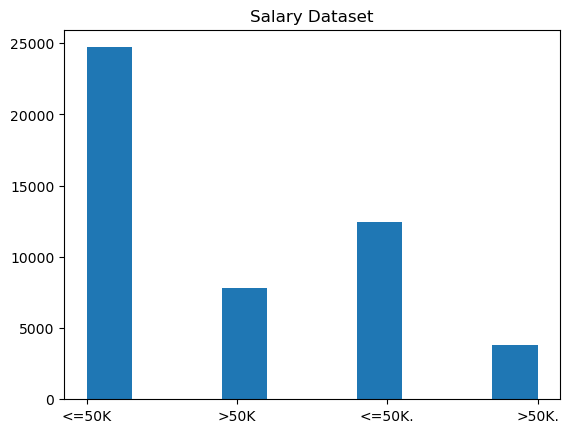

In [5]:
#Plot a Histogram of the data 
#We need to frame the data 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#Plotting a Histogram for the Data 
data_set = np.array(Y)
plt.hist(data_set)
plt.title('Salary Dataset')
plt.show()

In [6]:
#Task 3: Find the number of missing values: 
#X is the features of the data

missing_features = (X == '?').sum()
print(str(missing_features))

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
dtype: int64


In [7]:
#Task 4: Replace the missing values you found in the previous step with null(nan) 

X.replace('?', np.nan)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [8]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn import set_config



numbers = selector(dtype_include='number')(X)
categories = selector(dtype_exclude='number')(X)


num_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())


cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())

preprocessing = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, numbers),
        ('cat', cat_pipeline, categories)
    ],
    remainder='passthrough' 
)

# Run the pipeline 
X_prepared = preprocessing.fit_transform(X)
print(X_prepared.shape)

# Display the pipeline
set_config(display='diagram')
preprocessing


(48842, 108)


ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['age', 'fnlwgt', 'education-num',
                                  'capital-gain', 'capital-loss',
                                  'hours-per-week']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['workclass', 'education', 'marital-status',
                                  'occupation', 'relationship', 'race', 'sex',
                                  'native-country'])])

In [9]:
#Task 6: Check the target value_counts 
print(Y.value_counts())


income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
dtype: int64


In [10]:
#Task 7: Remove the period at the end of the >50K. and <=50K. 
#i.e., replace all instances that are <=50K. with <=50K , and replace all the instances that are >50K. with >50K

# Assuming 'data_df' is your DataFrame
Y = Y.replace({'>50K.':'>50K', '<=50K.':'<=50K'})
print(Y.value_counts()) 


income
<=50K     37155
>50K      11687
dtype: int64


In [11]:
# Task 8: Split the data into 80% training set and 20% testing set, print the shape of X_train, X_test, y_train, y_test in one command.

from sklearn.model_selection import train_test_split
X = X_prepared



X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)



(39073, 108) (39073, 1) (9769, 108) (9769, 1)


In [ ]:
#Task 9: Train a svm model (svc) to predict if the income of the adult exceeds 50K on the training set using: kernel = poly, gamma = 1, and C =0.1. Call your model model_svm.
#Tip: If your model is taking a long time to train, train on the first 10,000 examples only:
#model_svm = SVC(kernel='poly', C=0.1, gamma=1)
#model_svm.fit(X_train.iloc[:10000], y_train.iloc[:10000].values.ravel())
#Task 9.1: Test your model on the X_Test, and report the classification_report on the y_test and y_predict.
#Task 9.2: Display the confusion matrix of your test results using ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


model_svm = SVC(kernel='poly', C=0.1, gamma=1)

model_svm.fit(X_train, y_train.values.ravel())

# Test the model on the test set (X_Test)
y_predict = model_svm.predict(X_Test)

# Generate classification report
report = classification_report(y_test, y_predict)
print(report)


cm = confusion_matrix(y_test, y_predict)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()



In [ ]:
#Task 10: 
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42) 


print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)
